### Linear regression

Imports

In [1]:
import pandas as pd
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import seaborn as sb
from sklearn import tree as sktree
from sklearn import linear_model

In [2]:
X_train = pd.read_csv("sets/X_train.csv")
X_test = pd.read_csv("sets/X_test.csv")
y_train = pd.read_csv("sets/y_train.csv")
y_test = pd.read_csv("sets/y_test.csv")

Linear regression is a simple ML model. We want to try to find the best hyperplane to fit the features in our data

In [3]:
linearReg = linear_model.LinearRegression()
linearReg.fit(X_train, y_train)
y_pred = linearReg.predict(X_test)
y_pred_train = linearReg.predict(X_train)

In [4]:
print(f"RMSE: {metrics.mean_squared_error(y_test, y_pred, squared=False)}")
print(f"R2: {metrics.r2_score(y_test, y_pred)}")

print(f"RMSE for training: {metrics.mean_squared_error(y_train, y_pred_train, squared=False)}")
print(f"R2 for training: {metrics.r2_score(y_train, y_pred_train)}")

RMSE: 17.557673375627637
R2: 0.11861258412993103
RMSE for training: 17.618735533118038
R2 for training: 0.12045204837168821


We can see that the model perform similar in both train and test set, because linear regression can't overfit data.

Text(0, 0.5, 'number of assessments')

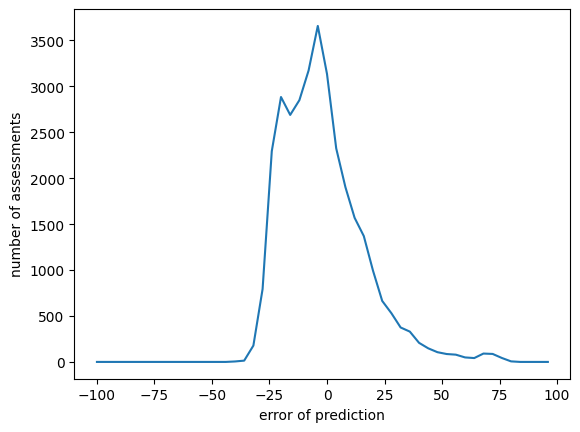

In [5]:
intervals=50
sliceInterval= 200/intervals
quantities=np.zeros(intervals)
values=np.zeros(intervals)
y_diff=y_pred-y_test.values
for j in range(intervals):
    quantities[j]= np.logical_and(y_diff >(sliceInterval*j)-100,y_diff < (sliceInterval*(j+1))-100).sum()
    values[j]=(sliceInterval*j)-100

plt.plot(values,quantities)
plt.xlabel("error of prediction")
plt.ylabel("number of assessments")


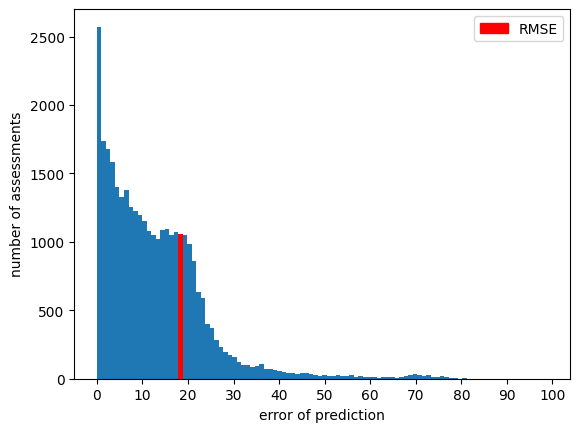

In [6]:
y_pred= y_pred.round()
y_test= y_test.round()
y_diff= y_pred-y_test.values
y_diff= abs(y_diff)
errori = np.zeros(100)

errori[0] = np.logical_and(y_diff >= 0, y_diff <= 1).sum()
for i in range(1,99):
    errori[i] = np.logical_and(y_diff > i, y_diff <= i+1).sum()

x = [i for i in range(100)]
plt.xticks([i*10 for i in range(11)])
_, _, patches = plt.hist(x=x,weights=errori,bins =100)
patches[18].set_facecolor('r')
plt.xlabel("error of prediction")
plt.ylabel("number of assessments")
red_patch = mpatches.Patch(color='red', label='RMSE')
plt.legend(handles=[red_patch]) 
plt.show()

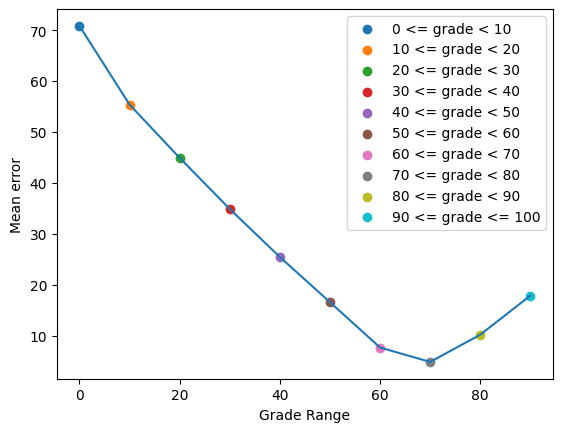

In [69]:
n_classes = 10

errors = abs(y_test.values - y_pred)
mean_diff = np.zeros(n_classes)
mean_diff[0] = errors[np.logical_and(y_test >= 0, y_test <= (1/n_classes)*100)].mean()

for i in range(1,n_classes):
    mean_diff[i] = errors[np.logical_and(y_test > (i/n_classes)*100, y_test <= ((i+1)/n_classes)*100)].mean()

classes = [i*10 for i in range(n_classes)]

j = 0
for x in classes:
    plt.scatter(classes[j], mean_diff[j], label=f'{(j*10)} <= grade <{"=" if j == n_classes-1 else ""} {(j+1)*10}')
    j += 1

plt.plot(classes, mean_diff)
plt.xlabel("Grade Range")
plt.ylabel("Mean error")
plt.legend()
plt.show()